# Table of contents

1. Loading JARVIS-DFT 3D and 2D json from figshare 
2. Making pandas dataframe,
3. Properties available, keys
4. Histogram of properties
5. Compare bandgaps from different DFT methods, OptB88vdW, TBmBJ
6. Multi-property filter for 3D material-screenig example
7. Example: find all cubic materials
8. Exfoliation energy distribution for 2D materials
9. Multi-property filter for 2D dataset

### We have prepared a basic json file with meta-data associated with JARVIS-DFT. So, first let's import jarvis-dft metadata from the figshre repository. This has been built as a module in the jarvis-tools


In [1]:
# !pip install jarvis-tools, and restart runtime in the notebook if you haven't installed it yet
from jarvis.db.figshare import data

dft_3d = data('dft_3d')
dft_2d = data('dft_2d')

In [2]:
# data-size
print (len(dft_3d),len(dft_2d))

36099 1070


In [3]:
# let's make a pandas dataframe from the figshare json file
# pip install pandas, if you haven't installed yet
import pandas as pd
import numpy as np

df=pd.DataFrame(dft_3d)

In [4]:
# Keys in the json file
print (df.columns, len(df.columns))

Index(['atoms', 'bulk_modulus_kv', 'dfpt_piezo_max_dielectric',
       'dfpt_piezo_max_dielectric_electronic',
       'dfpt_piezo_max_dielectric_ionic', 'dfpt_piezo_max_dielectric_ioonic',
       'dfpt_piezo_max_dij', 'dfpt_piezo_max_eij', 'effective_masses_300K',
       'ehull', 'elastic_tensor', 'encut', 'epsx', 'epsy', 'epsz',
       'exfoliation_energy', 'formation_energy_peratom', 'icsd', 'jid',
       'kpoint_length_unit', 'kpoints_array', 'magmom_oszicar',
       'magmom_outcar', 'max_ir_mode', 'mbj_bandgap', 'mepsx', 'mepsy',
       'mepsz', 'min_ir_mode', 'modes', 'n-Seebeck', 'n-powerfact',
       'optb88vdw_bandgap', 'optb88vdw_total_energy', 'p-Seebeck',
       'p-powerfact', 'shear_modulus_gv', 'slme', 'spillage'],
      dtype='object') 39


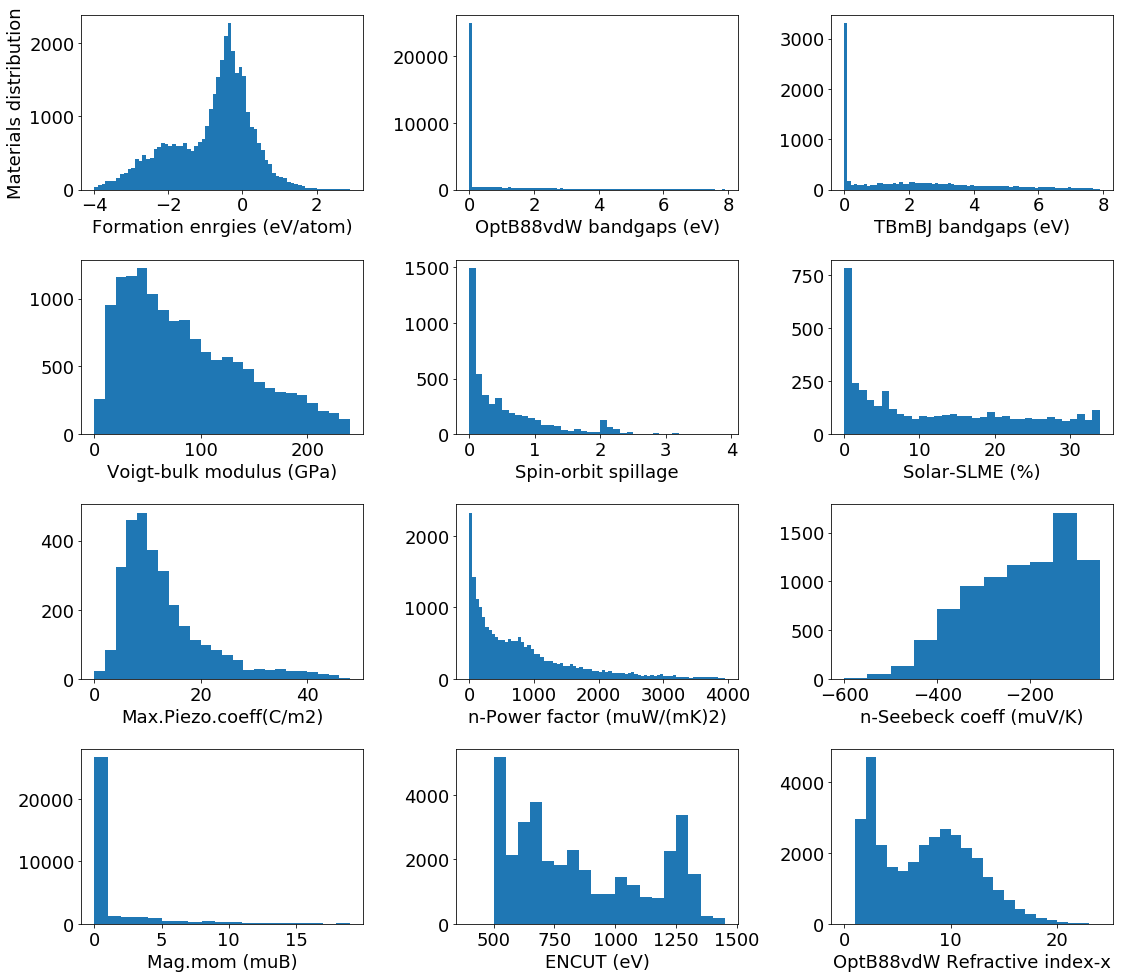

In [5]:
# Now let's make a histogram for some of the material-properties in the dataset
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

the_grid = GridSpec(4, 3)
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(16,14))

plt.subplot(the_grid[0, 0])
val=np.array(df['formation_energy_peratom'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val,bins=np.arange(-4,3,.1))
plt.xlabel('Formation enrgies (eV/atom)')
plt.ylabel('Materials distribution')

plt.subplot(the_grid[0, 1])
val=np.array(df['optb88vdw_bandgap'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val,bins=np.arange(0,8,.1))
plt.xlabel('OptB88vdW bandgaps (eV)')
#plt.ylabel('Materials distribution')

plt.subplot(the_grid[0, 2])
val=np.array(df['mbj_bandgap'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val,bins=np.arange(0,8,.1))
plt.xlabel('TBmBJ bandgaps (eV)')
#plt.ylabel('Materials distribution')

plt.subplot(the_grid[1, 0])
val=np.array(df['bulk_modulus_kv'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val,bins=np.arange(0,250,10))
plt.xlabel('Voigt-bulk modulus (GPa)')
#plt.ylabel('Materials distribution')


plt.subplot(the_grid[1, 1])
val=np.array(df['spillage'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val,bins=np.arange(0,4,.1))
plt.xlabel('Spin-orbit spillage')
#plt.ylabel('Materials distribution')

plt.subplot(the_grid[1, 2])
val=np.array(df['slme'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val,bins=np.arange(0,35,1))
plt.xlabel('Solar-SLME (%)')
#plt.ylabel('Materials distribution')


plt.subplot(the_grid[2, 0])
val=np.array(df['dfpt_piezo_max_dielectric'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val,bins=np.arange(0,50,2))
#plt.ylabel('Materials distribution')
plt.xlabel('Max.Piezo.coeff(C/m2)')


plt.subplot(the_grid[2, 1])
val=np.array(df['n-powerfact'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val,bins=np.arange(0,4000,50))
#plt.ylabel('Materials distribution')
plt.xlabel('n-Power factor (muW/(mK)2)')

plt.subplot(the_grid[2, 2])
val=np.array(df['n-Seebeck'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val,bins=np.arange(-600,0,50))
#plt.ylabel('Materials distribution')
plt.xlabel('n-Seebeck coeff (muV/K)')


plt.subplot(the_grid[3, 0])
val=np.array(df['magmom_oszicar'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val,bins=np.arange(0,20,1))
#plt.ylabel('Materials distribution')
plt.xlabel('Mag.mom (muB)')


plt.subplot(the_grid[3, 1])
val=np.array(df['encut'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val,bins=np.arange(400,1500,50))
#plt.ylabel('Materials distribution')
plt.xlabel('ENCUT (eV)')



plt.subplot(the_grid[3, 2])
val=np.sqrt(np.array(df['epsx'].replace('na',np.nan).dropna().values,dtype='float'))
plt.hist(val,bins=np.arange(0,25,1))
#plt.ylabel('Materials distribution')
plt.xlabel('OptB88vdW Refractive index-x')

plt.tight_layout()

Mats. with both OptB88vdW bandgaps 36099
Mats. with both TBmBJ abd OptB88vdW bandgaps 9947


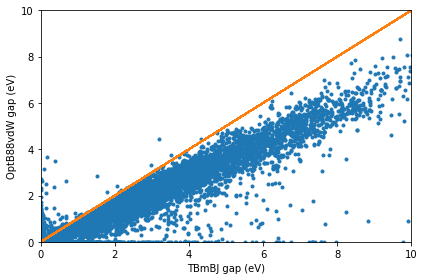

In [6]:
# Let's compare OptB88vdW and TBmBJ bandgaps
df2=df[['optb88vdw_bandgap','mbj_bandgap']].replace('na',np.nan).dropna()
plt.plot(df2['mbj_bandgap'], df2['optb88vdw_bandgap'],'.')
plt.plot(df2['mbj_bandgap'], df2['mbj_bandgap'])
plt.xlim([0,10])
plt.ylim([0,10])
plt.xlabel('TBmBJ gap (eV)')
plt.ylabel('OptB88vdW gap (eV)')
plt.tight_layout()
print ('Mats. with both OptB88vdW bandgaps', len(df['optb88vdw_bandgap']))
print ('Mats. with both TBmBJ abd OptB88vdW bandgaps', len(df2['mbj_bandgap']))

### Material-screening example: Let's find materials which has Bi element, has spin-orbit spillage >= 0.5, have OptB88vdW bandgaps > 0.1, energy above convex hull < 0.1 eV/atom , have SLME >5 %

In [7]:
df3 = df[['optb88vdw_bandgap','spillage', 'ehull', 'slme', 'atoms', 'jid']].replace('na',np.nan).dropna()

In [8]:
from jarvis.core.atoms import Atoms
def has_element(atoms_dict = {}, my_element = 'Bi'):
    atoms = Atoms.from_dict(atoms_dict)
    elements = atoms.elements
    if my_element in elements:
        return True
    else:
        return np.nan
    
df3['el'] = df3['atoms'].apply(lambda x: has_element(atoms_dict = x, my_element = 'Bi'))
df3['formula'] = df3['atoms'].apply(lambda x: Atoms.from_dict(x).composition.reduced_formula)

In [9]:
df4 = df3.dropna()

In [10]:
df4[(df4['optb88vdw_bandgap'] >= .1) & (df4['spillage'] >=.5 ) & (df4['ehull'] <=.1 ) & (df4['slme'] >=5 )  ]

,optb88vdw_bandgap,spillage,ehull,slme,atoms,jid,el,formula
180,0.9855,0.755,0.025189,32.282755,"{'lattice_mat': [[4.1670203186750125, 0.0, 0.0...",JVASP-5215,True,Bi2Se3
257,0.5569,1.275,0.012965,31.805149,"{'lattice_mat': [[4.425877989755294, 0.0, 0.0]...",JVASP-5374,True,BiI
752,0.3072,4.032,0.000000,29.685680,"{'lattice_mat': [[5.222331821181116, -0.0, 0.0...",JVASP-22653,True,BiNSr3
758,0.5344,2.677,0.000000,33.434736,"{'lattice_mat': [[4.172273561810926, -1.864909...",JVASP-22657,True,BiLiMg
862,0.5039,1.639,0.000000,20.337451,"{'lattice_mat': [[0.0, 3.485394766378691, 3.48...",JVASP-22724,True,BiLi2Na
2020,0.8202,0.682,0.011756,29.993716,"{'lattice_mat': [[4.420421720230594, 0.0, 0.0]...",JVASP-32749,True,BiI
2026,0.7193,1.179,0.012828,29.839427,"{'lattice_mat': [[4.260514703242369, 1.1598804...",JVASP-32759,True,BiBr
2100,0.4932,0.839,0.000000,31.705820,"{'lattice_mat': [[4.26929704078232, -2e-16, 0....",JVASP-29647,True,Bi2Pb2Se5
3367,0.2744,1.271,0.000000,27.298235,"{'lattice_mat': [[5.395927183581751, 0.0, -0.0...",JVASP-36474,True,BiCa3P
3846,0.5555,2.094,0.000000,33.774224,"{'lattice_mat': [[4.899594431025933, 0.0, 0.0]...",JVASP-35067,True,BiKMg


### Find all cubic materials

In [25]:
from jarvis.analysis.structure.spacegroup import Spacegroup3D
# Takes some time because we are running spacegroup analysis on all the materials
def crystal_system(atoms_dict={}):
    atoms = Atoms.from_dict(atoms_dict)
    system = Spacegroup3D(Atoms.from_dict(atoms_dict)).crystal_system
    return system
df['crystal_system'] = df['atoms'].apply(lambda x: crystal_system(atoms_dict = x))

In [29]:
len(df[df['crystal_system']=='cubic'])

10725

In [38]:
# We can store the screened materials in a new json file
# Note that the primitive cell can have non-equal lattice-constants but not the conventional cell
from jarvis.db.jsonutils import dumpjson
dumpjson(data = df[df['crystal_system']=='cubic']['atoms'].values.tolist(), filename='all_cubic.json')

### Working with 2D dataset

In [11]:
df_2d=pd.DataFrame(dft_2d)

In [12]:
df_2d.columns

Index(['atoms', 'bulk_modulus_kv', 'effective_masses_300K', 'elastic_tensor',
       'encut', 'epsx', 'epsy', 'epsz', 'exfoliation_energy',
       'formation_energy_peratom', 'icsd', 'jid', 'kpoint_length_unit',
       'kpoints_array', 'magmom_oszicar', 'magmom_outcar', 'mbj_bandgap',
       'mepsx', 'mepsy', 'mepsz', 'modes', 'optb88vdw_bandgap',
       'optb88vdw_total_energy', 'shear_modulus_gv'],
      dtype='object')

Text(0.5, 0, 'Exfoliation energy (eV)')

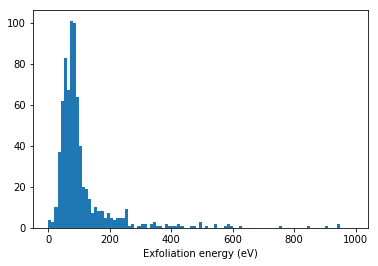

In [13]:
val=np.array(df_2d['exfoliation_energy'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val,bins=np.arange(0,1000,10))
#plt.ylabel('Materials distribution')
plt.xlabel('Exfoliation energy (eV)')

In [14]:
#Let's find exfoliable 2D materials with magnetic moment>0.5 muB , optb88vdw_bandgap > 0.05 and exfoliation_energy < 200

In [15]:
df_2d_a = df_2d[['atoms', 'optb88vdw_bandgap','exfoliation_energy', 'magmom_oszicar','jid']].replace('na',np.nan).dropna()

In [16]:
df_2d_a['formula'] = df_2d_a['atoms'].apply(lambda x: Atoms.from_dict(x).composition.reduced_formula)

In [17]:
df_2d_a[(df_2d_a['optb88vdw_bandgap'] >= .05) & (df_2d_a['exfoliation_energy'] <200 ) & (df_2d_a['magmom_oszicar'] >=.5  )  ]

,atoms,optb88vdw_bandgap,exfoliation_energy,magmom_oszicar,jid,formula
85,"{'lattice_mat': [[3.626624525225858, 0.0, 0.0]...",0.7098,71.726433,3.0010,JVASP-8879,Cl2V
114,"{'lattice_mat': [[5.791947881162556, 4.7246239...",1.0017,72.344250,2.0016,JVASP-6742,Cl3Fe
118,"{'lattice_mat': [[3.49758854204341, -1e-16, 0....",0.0673,67.410900,4.0006,JVASP-6055,Cl2Fe
120,"{'lattice_mat': [[3.470086624548717, 0.0, 0.0]...",0.3612,67.445633,2.9996,JVASP-8915,Cl2Co
127,"{'lattice_mat': [[6.072311052981682, 0.0, 0.0]...",0.2715,95.031000,3.9994,JVASP-6109,Br3Mo
132,"{'lattice_mat': [[6.621200559103531, 7.3177935...",2.5423,86.921111,2.9980,JVASP-6211,Ag2Cl6Re
184,"{'lattice_mat': [[6.342736616079045, 4.0756293...",1.1182,79.077625,6.0000,JVASP-6088,Br3Cr
204,"{'lattice_mat': [[4.117015872889953, -1e-16, 0...",0.5088,82.286733,4.9970,JVASP-6031,I2Mn
215,"{'lattice_mat': [[3.67410494805411, 0.0, 0.0],...",0.5854,67.520833,4.9997,JVASP-6064,Cl2Mn
217,"{'lattice_mat': [[3.8440898595529083, -7.93142...",0.5181,74.126233,5.0001,JVASP-6067,Br2Mn
